### Business Data Analytics and Prediction
*Dr. Gilli Shama*

## Lesson 1.3 Look into the data: Explore, and prepare data for ML 

In lesson 2 we performed a machine leanring project end to end. In this lesson we will expand the parts of data preparation and exploratory data analytics (EDA). We will look into the data, explore it and we will prepare it for machine learning modeling.

As before, we have all imports on the top:
* In this lesson we will use pandas to read and manipulate data
* We will use matplotlib to visualize the data, which we encountered in lesson 2.
* In this lesson we will use a new library: seaborn, which gives some advanced graphical capabilities.
* We will import functions from sklearn to prepare data for machine learning
* We will transform our data to a numpy array for further modeling on next lessons

In [2]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### 1. Basic data exploration

#### 1.1. Download and read the data

The business analytics concepts and code will be demonstrated on HR data of employees attrition, evaluation and satisfaction: https://www.kaggle.com/ludobenistant/hr-analytics. Download the csv file from the link above, to your local folder, under a folder called Data.

In [11]:
df = pd.read_csv(url, error_bad_lines=False) 
df.head()
#For Windows users: Add the letter r before the path, to keep the copied path
# Change the file to your downloaded location and name.  

b'Skipping line 75: expected 1 fields, saw 4\nSkipping line 123: expected 1 fields, saw 3\nSkipping line 142: expected 1 fields, saw 4\nSkipping line 146: expected 1 fields, saw 2\nSkipping line 148: expected 1 fields, saw 2\nSkipping line 149: expected 1 fields, saw 2\nSkipping line 150: expected 1 fields, saw 2\nSkipping line 151: expected 1 fields, saw 2\nSkipping line 152: expected 1 fields, saw 2\nSkipping line 153: expected 1 fields, saw 2\nSkipping line 154: expected 1 fields, saw 2\nSkipping line 158: expected 1 fields, saw 2\nSkipping line 159: expected 1 fields, saw 2\nSkipping line 165: expected 1 fields, saw 2\nSkipping line 173: expected 1 fields, saw 4\nSkipping line 179: expected 1 fields, saw 2\nSkipping line 184: expected 1 fields, saw 2\nSkipping line 185: expected 1 fields, saw 2\nSkipping line 186: expected 1 fields, saw 2\nSkipping line 187: expected 1 fields, saw 2\nSkipping line 188: expected 1 fields, saw 2\nSkipping line 193: expected 1 fields, saw 2\nSkipping 

,<!DOCTYPE html>
0,"<html lang=""en"">"
1,<head>
2,"<meta charset=""utf-8"">"
3,"<link rel=""dns-prefetch"" href=""https://githu..."
4,"<link rel=""dns-prefetch"" href=""https://avata..."


In [3]:
dfm = pd.read_csv(r"..\Data\trip.csv")

#### 1.2. Take a quick look on the data 

Use the head, info function to get a sense of your data.

In [ ]:
df.head()

In [ ]:
dfm.head()

In [ ]:
df.info()

There are 10 features: 8 numeric and 2 categorical.

The describe function is applied to numeric features only: 

In [ ]:
df.describe()

In [ ]:
dfm.describe()

For categrical variables use value_counts function:

In [ ]:
df["sales"].value_counts()

In [ ]:
dfm["start_station_name"].value_counts()

In [ ]:
dfm["end_station_name"].value_counts()

In [ ]:
df["salary"].value_counts()

#### 1.3. Identify missing data
To identify missing values you can look on the describe function results, or to use the direct functions isna and isnull, with sum.

In [ ]:
dfm.isnull().sum()

#### 1.4. Handle missing data
In our example there are no missing values. if you find on your project missing values you need to clean them by one of the following ways:

##### 1.4.1 Drop the samples (rows) with missing values

In [ ]:
df = df.dropna() # Drop all rows that have a missing value
df = df[df['promotion_last_5years'] != -1] # If we would have missing on the promotion column marked with -1, then this drops the rows with such missing
df

##### 1.4.2 Drop the features (columns) with missing values

In [ ]:
# df = df.drop('column_name', axis = 1)   # This drops a specific column in ''

df = df.dropna(axis = 1) # Drop all columns with a missing value. axis=0 means rows and axis =1 is colmns. 
df = df.dropna(axis = 1, how ='all')  # Drop only columns with all values missing add: how='all'

##### 1.4.3 Fill the missing with values

In [ ]:
df = df.fillna(value = df.mean()) #Value can be also specified. 

In [ ]:
dfm = dfm.fillna(value = "0") #Value can be also specified. 
dfm.isnull().sum()

#### 1.5 End the basic handling

After you handled the missing values in one of the ways above, note to look on the data again, and check again if there are any missing values left.

In [ ]:
df.info()

### 2. Explore categorical feature

In this section we will explore each categorical feature independently. The target of this exploration is to prepare each feature for next exploration and modeling. We will go through the following activities:
1. View categorical data with bar plots
2. Encode categorical data as integer

#### 2.1.  View categorical data 

Categorical data can be viewed by its value counts. This includes: vertical bars, horizontal bars, and pie charts. 

##### 2.1.1 seaborn library

Below plots of vertical and horizontal bars are in seaborn, which is much easier to program than matplotlib.

You just need to use the countplot function and give it the data frame and the column to plot.

sns = קיצור ל seaborn שעושה גרפים

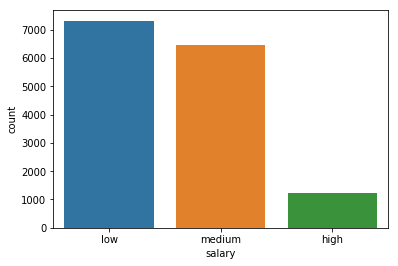

In [5]:
sns.countplot(x='salary', data=df)

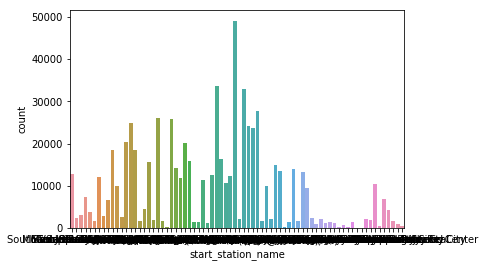

In [4]:
sns.countplot(x='start_station_name', data=dfm)

In [ ]:
sns.countplot(x='duration', data=dfm)

hue = split

In [ ]:
sns.countplot(y='sales', data=df, color='blue',hue = 'left')

##### 2.1.2.  matplot lib

Below is a pie chart is in matplotlib.
You need to deine the figure and the pie is a subplot in it. 
You need to take care to extract the values and the labels for the chart's parts.

For bar plots in matplotlib see: 
* https://medium.com/python-pandemonium/data-visualization-in-python-bar-graph-in-matplotlib-f1738602e9c4 
* https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html 


In [ ]:
fig1, ax1 = plt.subplots()

slices = df["sales"].value_counts()
labels = slices.index
ax1.pie(slices, autopct='%1.1f%%', labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
fig1, ax1 = plt.subplots()

slices = dfm["start_station_name"].value_counts()
labels = slices.index
ax1.pie(slices, autopct='%1.1f%%', labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 2.2 Encode categorical features as integer
Categorical variables need to be transformed to an integer, as sklearn works with numeric data only.


##### 2.2.1 Encode ordinal feature
We can define a dictionary that maps each ordinal value to a numerical value, and then use the function "map" as shown below, or use the function "replace" as shown in: http://pbpython.com/categorical-encoding.html .

In [ ]:
salary_map = {'low':0, 'medium':1, 'high':2}  #Define the mapping as a dictionary
df["salary"] =  df["salary"].map(salary_map)
df.info()

In [ ]:
sns.countplot(x='salary', data=df)

##### 2.2.2 Encoding of nominal features
We now wish to encode the "sales" column. The "sales" column has the following 10 values:
* 'sales':0, 'accounting':1, 'hr':2, 'technical':3, 'support':4, 'management':5, 'IT':6, 'product_mng':7, 'marketing':8, 'RandD':9


To encode the feature we can define a feature per each variable. However, manual one by one change is not recomended, as the categorical column may have large or changing number of values. There are many methods to encode the features automaticaly. As we learn now the pandat package, we will use its method 'get_dummies'. See more solutions in: http://pbpython.com/categorical-encoding.html

In [ ]:
df = pd.get_dummies(df, columns=["sales"], prefix=["job"]) #You cant run this command twice as df changes. Select from Kernal menue the Restart and Run All option 
df.head(10)

In [ ]:
df.info()

Now, all the features are numeric.

### 3. Explore numerical features

In this section we will explore each numerical feature independently. The target of this exploration is to prepare each feature for next exploration and modeling. We will go through the following activities:
1. View numerical variable
2. Numerical data manipulations
3. Bring numerical features into the same scale (this must be on train set, and then expanded to test set)


#### 3.1 Histograms to view features


As a first step visualize each variable separately. Possible visualizations are: histogram, density and boxplot. Where the first one is the most common and recommended. Use histogram to understand the values distribution, noting that many statistical model assume normal distribution.


Start with simple out of the box histogram. As before, you can run the hist command on the netire data frame or on a selected feature.

In our example, the numerical features are the first 5 ones.

In [ ]:
df.hist(bins = 200, figsize = (20,15), column=["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company"]) #Check the hist parameters by clicking on the Tab completion. 
plt.show()

In [ ]:
sns.distplot(df["satisfaction_level"])

In [ ]:
from scipy.stats import norm  #If this works fine, then move the import line to the top
sns.distplot(df["satisfaction_level"], fit=norm)

#### 3.2. Handle non normal distribution

See the histogram above. The distribution is far from being normal.

To handle non normal distribution we will:
1. **Split** the data of *satisfaction level* on 0.25, as we can clearly see two diffrent distributions
2. **Clip** the data of *Working hours*, because of extreme low and high values that are not feasable
3. Perfom **log transformation** on *experiance at the company*, as there is a right tail

##### 3.2.1 Split

In [ ]:
df_highsat = df[df["satisfaction_level"] > 0.25] 
df_lowsat = df[df["satisfaction_level"] <= 0.25] 
sns.distplot(df_highsat["satisfaction_level"], fit=norm)
sns.distplot(df_lowsat["satisfaction_level"], fit=norm)

For our course demo we will not split the data, as we would see how diffrent algorithems handle data that is not normal.
For your project from this point progress with several options: all data, split to low, and split to high.

##### 3.2.2. Data Cliping

Look on the average monthly working hours histogram above. There are two outliers groups: employees that worked less than 120 hours per month, and employees that worked more than 280 hours per month. These two extreme numbers are small in frequency and are extreme. By lciping we will take out the edges.

In [ ]:
monthly_hours = np.clip(df['average_montly_hours'], 120, 280 )

In [ ]:
plt.hist(df['average_montly_hours'], bins=50)
plt.hist(monthly_hours, bins=38, color='red', alpha = 0.5)
plt.show()

After we see that we would like to continue with the clipping, and we selected the desired boundaries, we may change the data set. (In our example we will skip cliping, so the code is in a comment)

In [ ]:
# df['average_montly_hours'] = np.clip(df['average_montly_hours'], 120, 280 )

##### 3.2.3. Log transformation

When we have data with a log right cell (and no 0 or negative values) a log transformation shortens the tail. 

Look on the histogram of *time spend company* it has a long tail, as most employees are 2-3 year at the company, and few reach near 10 years. Also so are no employees that are 0 or negative time at the company.

In [ ]:
log_time_company = np.log(df["time_spend_company"])
sqrt_time_company = np.sqrt(df["time_spend_company"])

In [ ]:
sns.distplot(df["time_spend_company"], fit=norm)

In [ ]:
sns.distplot(log_time_company, fit=norm, bins=15)
sns.distplot(sqrt_time_company-0.65, fit=norm, bins=15)

Both log and sqrt shorten the tail, but are both far from perfect normalization. The sqrt (green) has a longer right tail. therefore, we will select the log. We can continue and look for more transformations.

Rename the new column with the transformation, so that it will be interpreatbale.

You may keep both original column and transformed, as some models know to pick the best form them.

In [ ]:
df["time_spend_company_log"] = np.log(df["time_spend_company"])

### 4. Split the data to train and test

EDA and data preparations are done only on train data. Test data is set aside, so testing will be objective, and your model won’t be influenced from what you saw in the test data. Typically 20%-30% of the rows go randomly to test data. 
Look on the data before and after the split.


In [ ]:
df.describe()

In [ ]:
train_df, test_df= train_test_split (df, test_size = 0.2, random_state=7) # train_test_split is from sklearn. It requiers that the data will be a numpy array, that is numbers only.

# If your prediction class in y is very small, then add a parameter startify = y

In [ ]:
train_df.describe()

In [ ]:
y = train_df["left"]
X = train_df

### 5. Explore features connections

#### 5.1 Explore correlation between numeric features 
Numerical features linear dependency can be measured by correation. The correlataions numbers can be displayed in correlation table, or visualized in a heat map. 
##### 5.1.1 Correlation table

In [ ]:
train_df_numeric = train_df.iloc[:, 0:5] # iloc = integer-location based indexing for selection by position
corr_df=train_df_numeric.corr()
corr_df

#### 5.1.2. Heatmap

In [ ]:
sns.heatmap(corr_df)

In [ ]:
sns.heatmap(corr_df[(corr_df<1) & ((corr_df >= 0.3) | (corr_df <= -0.3)) ] )

#### 5.2 Scatter plots between numerical features

A scatter plot is useful to visualize connections between numerical features that are not only linear.

In [ ]:
plt.scatter(data = train_df, x="last_evaluation", y="satisfaction_level", alpha=0.1)

In [ ]:
sns.pairplot(train_df_numeric, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}})

#### 5.3. Connection to a categorical feature

The examples above is for numerical features only. We would like to examine the features connection to the targte feature "left".

##### 5.3.1 Connect categorical to categorical feature
Cross tab is the most common connetcion

In [ ]:
pd.crosstab(train_df['job_management'], train_df['left'], margins=True)

##### 5.3.2. Connect numeric and categorical feature

To connect between categorical and numeric feature we can compare the numeric values per each categorical option. To do this comaprison we can use:
1. Treat the categorical feature as numeric
2. Boxplot - compare numeric feature median and quartiles, between categorical values.The middle line is the median and the box top and low borders are quartiles. 
3. Groupby - group the data frame by the categorical values and then compare mean or std
4. Histograms by the categorical values

In [ ]:
corr_matrix = train_df.corr()
corr_matrix["left"].sort_values()

In [ ]:
sns.boxplot(x='left', y='average_montly_hours', data=train_df)

See nice examples in https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python and in https://github.com/ajaymache/data-analysis-using-python 

In [ ]:
train_df.groupby(['left']).mean()

In [ ]:
train_df.groupby(['left']).hist(bins = 200, figsize = (20,15), column=["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company"])

In [ ]:
plt.hist(train_df[train_df["left"] ==0]["satisfaction_level"], bins=50, color='blue', alpha = 0.5)
plt.hist(train_df[train_df["left"] ==1]["satisfaction_level"], bins=50, color='red', alpha = 0.5)
plt.show()

### 6 Data scaling

Data scaling brings all data to similar sizes, as required by many models.

#### 6.1 Min-max normalization
Min-max normalization transforms each feature to be between 0 and 1, by:
    * Substructing from each feature intance the minimum of the feature 
    * Dividing by the diffrance between maximum and minimum of the feature
Because scaling looks on a set of data, we need to mimic the exact same scaling to test data. That is instead of subtracting the min and dividing by max minus min of the test data we will subtract the min and divide by max minus min of the train data.  

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
train_df_normalized = mms.fit_transform(train_df) # fit is getting min and max, and transform changes the data by min-max
test_df_normalized = mms.transform(test_df) #for testing use transform only. Min and max are taken from the train

In [ ]:
plt.hist(train_df_normalized)
plt.show()

#### 6.2 Standartization
Standartization transforms each feature to be with mean 0 and standard derivation of 1, by:
    * Substructing from each feature intance the mean of the feature 
    * Dividing by the standard derivation of the feature
Because scaling looks on a set of data, we need to mimic the exact same scaling to test data. That is instead of subtracting the mean and dividing by stdv the test data we will subtract the mean and divide by stdv of the train data.  

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
train_df_std = stdsc.fit_transform(train_df) # fit is getting mean and std, and transform changes the data by standartization
test_df_std = stdsc.transform(test_df) #for testing use transform only. Mean and std are taken from the train

In [ ]:
plt.hist(train_df_std)
plt.show()

### 7. Wrap-up and save the processesd data sets

Now that you are done with EDA you need to (1) present results to stakeholders and get approval to project. (2) plan your product and anlaytics, (3) save the processed data sets for next step of modeling (you are likely to save several data sets)

In [ ]:
import pickle # pickle is a package to code Python output: data and models

In [ ]:
pickle.dump(train_df, open("train_df.dat", "wb")) # wb = write binary

Check that you have now a file named "train_df.dat" in the folder where this Python code is. This file is binary, so you can't read it. Now lets check that we can read this data back.

In [ ]:
train_df_read = pickle.load(open("train_df.dat", "rb"))

In [ ]:
train_df_read.describe()

Now lets pickle all other data sets that we wish to keep to next lessons. See similar example in: https://www.youtube.com/watch?v=GC50dexQsRo

In [ ]:
pickle.dump(test_df, open("test_df.dat", "wb"))
pickle.dump(train_df_std, open("train_df_std.dat", "wb"))
pickle.dump(test_df_std, open("test_df_std.dat", "wb"))

# THE END